In [1]:
from apiServer import *

In [2]:
api_server_instance = ApiServer()
api_server_instance.help()


__________NERLNET CHECKLIST__________
0. Run this Jupyter in the folder of generated .py files!
1. Make sure data and jsons in correct folder, and jsons include the correct paths
    * Data includes: labeled prediction csv, training file, prediction file
    * Prediction CSVs need to be ordered the same!
            
____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                       shows available arch / conn / exp layouts
-selectJsons():                     get input from user for arch / conn / exp selection
-setJsons(arch, conn, exp):         set layout in code
-getUserJsons():                    returns the selected arch / conn / exp
-initialization(arch, conn, exp):   set up server for a NerlNet run
-sendJsonsToDevices():              send each NerlNet device the arch / conn jsons to init entities on it
-sendDataToSources(phase):          phase can be "training" / "prediction". send the experiment data to sources (currently happens in 

In [3]:
api_server_instance.showJsons()
api_server_instance.selectJsons()
arch_json , connmap_json, exp_flow_json = api_server_instance.getUserJsons()


Architechure Files
--------------------

0.	arch_1PC1WorkerGUI.json
1.	arch_1PC1WorkerHealth.json
2.	arch_1PC1Worker_autoencoder.json
3.	arch_1PC2Worker2RouterGUI.json
4.	arch_1PC2WorkerGUI.json
5.	arch_1PC2WorkerHealth.json
6.	arch_1PC2Workers2Sources_autoencoder.json
7.	arch_1PC3Worker2SourcesHealth.json
8.	arch_1PC3WorkerHealth.json
9.	arch_2PC2WorkerHealth.json
10.	arch_2PC2Workers.json
11.	arch_2PC2Workers1Source.json
12.	arch_3Devs3Workers1SourceGUI.json
13.	arch_3Devs4Workers1SourceGUI.json
14.	arch_3PC2Workers1SourceMonitored.json
15.	arch_3PC3WorkerHealth.json
16.	arch_4Devs4Workers1Source.json
17.	arch_4Devs4Workers1Source1fed.json
18.	arch_4Devs4Workers1SourceMonitored.json
19.	arch_4Devs4Workers1Source_autoencoder.json
20.	arch_4Devs4Workers2Sources.json
21.	arch_4Devs4Workers2Sources1fed.json
22.	arch_4Devs4Workers2SourcesAzure.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	con

In [4]:
api_server_instance.initialization(arch_json , connmap_json, exp_flow_json)

Network components:
                 Receiver's Address: http://192.168.0.108:8095
                 Batchsize: 10
                 Frequency: 5
                 devicesIp: ['192.168.0.108']
                 mainServerIp: 192.168.0.108
                 mainServerPort: 8080
                 Clients: ['c1']
                 Workers: ['w1', 'w2', 'w3']
                 Federated networks: ['f1']
                 Sources: ['s1', 's2']
                 Routers: ['r1']
Experiment Data:
        Data source:    health_comb
        Batches to send per phase:
            Training:   100
            Prediction: 100
        
Initializing the receiver thread...

Using the address from the architecture JSON file for the receiver.
(http://192.168.0.108:8095)

 * Serving Flask app "receiver" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off

***Please remember to execute NerlnetRun.sh on each device before continuing.


In [5]:
api_server_instance.sendJsonsToDevices()


Sending JSON paths to devices...
Init JSONs sent to devices


In [6]:
api_server_instance.sendDataToSources("Training")


Sending data to sources
Update CSV Phase
Data sent to sources

Data ready in sources


In [7]:
api_server_instance.train()


Please choose a name for the current experiment: multi-label

Training - Starting...
Clients Training Phase

Start Casting Phase
~New result has been created successfully~
Training - Finished



In [8]:
#api_server_instance.contPhase("train")

In [9]:
api_server_instance.sendDataToSources("Prediction")


Sending data to sources
Update CSV Phase
Data sent to sources

Data ready in sources


In [10]:
api_server_instance.predict()

Prediction - Starting...
Clients Predict Phase

Start Casting Phase
~New result has been created successfully~
Prediction - Finished

Experiment saved


In [11]:
#api_server_instance.contPhase("predict")

In [12]:
api_server_instance.print_saved_experiments()


---SAVED EXPERIMENTS---

List of saved experiments:
1) multi-label


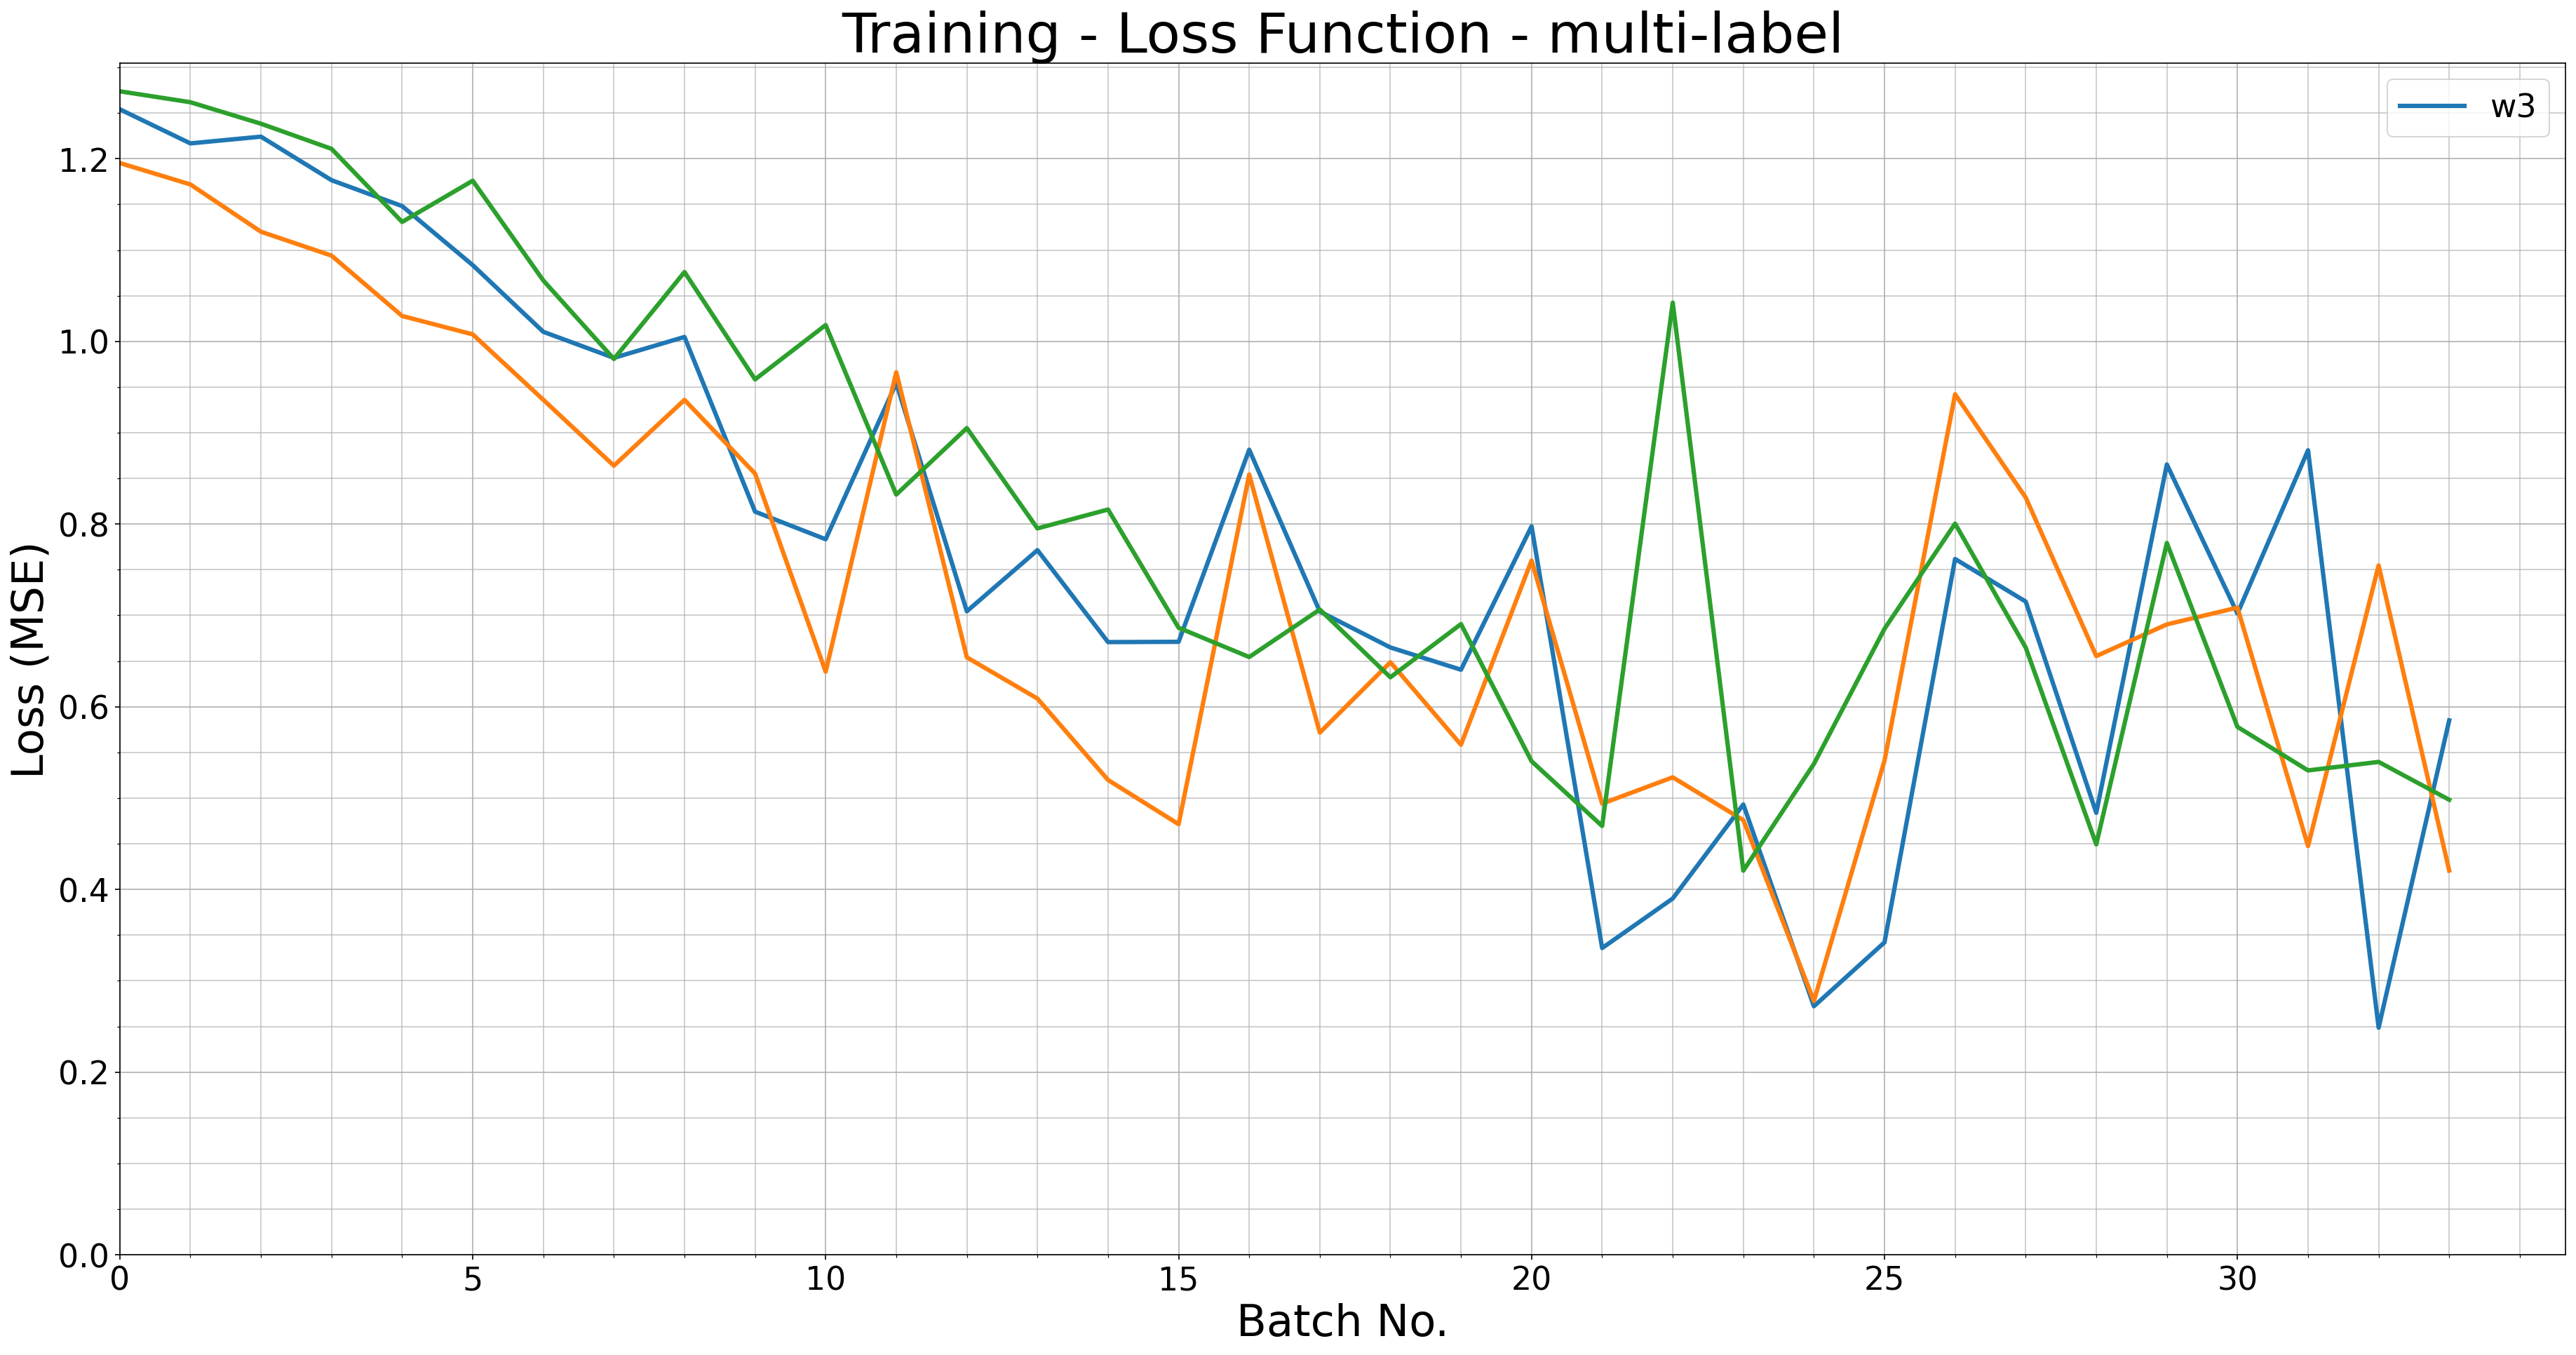


multi-label.png was Saved...


<Figure size 432x288 with 0 Axes>

In [13]:
api_server_instance.plot_loss(1)

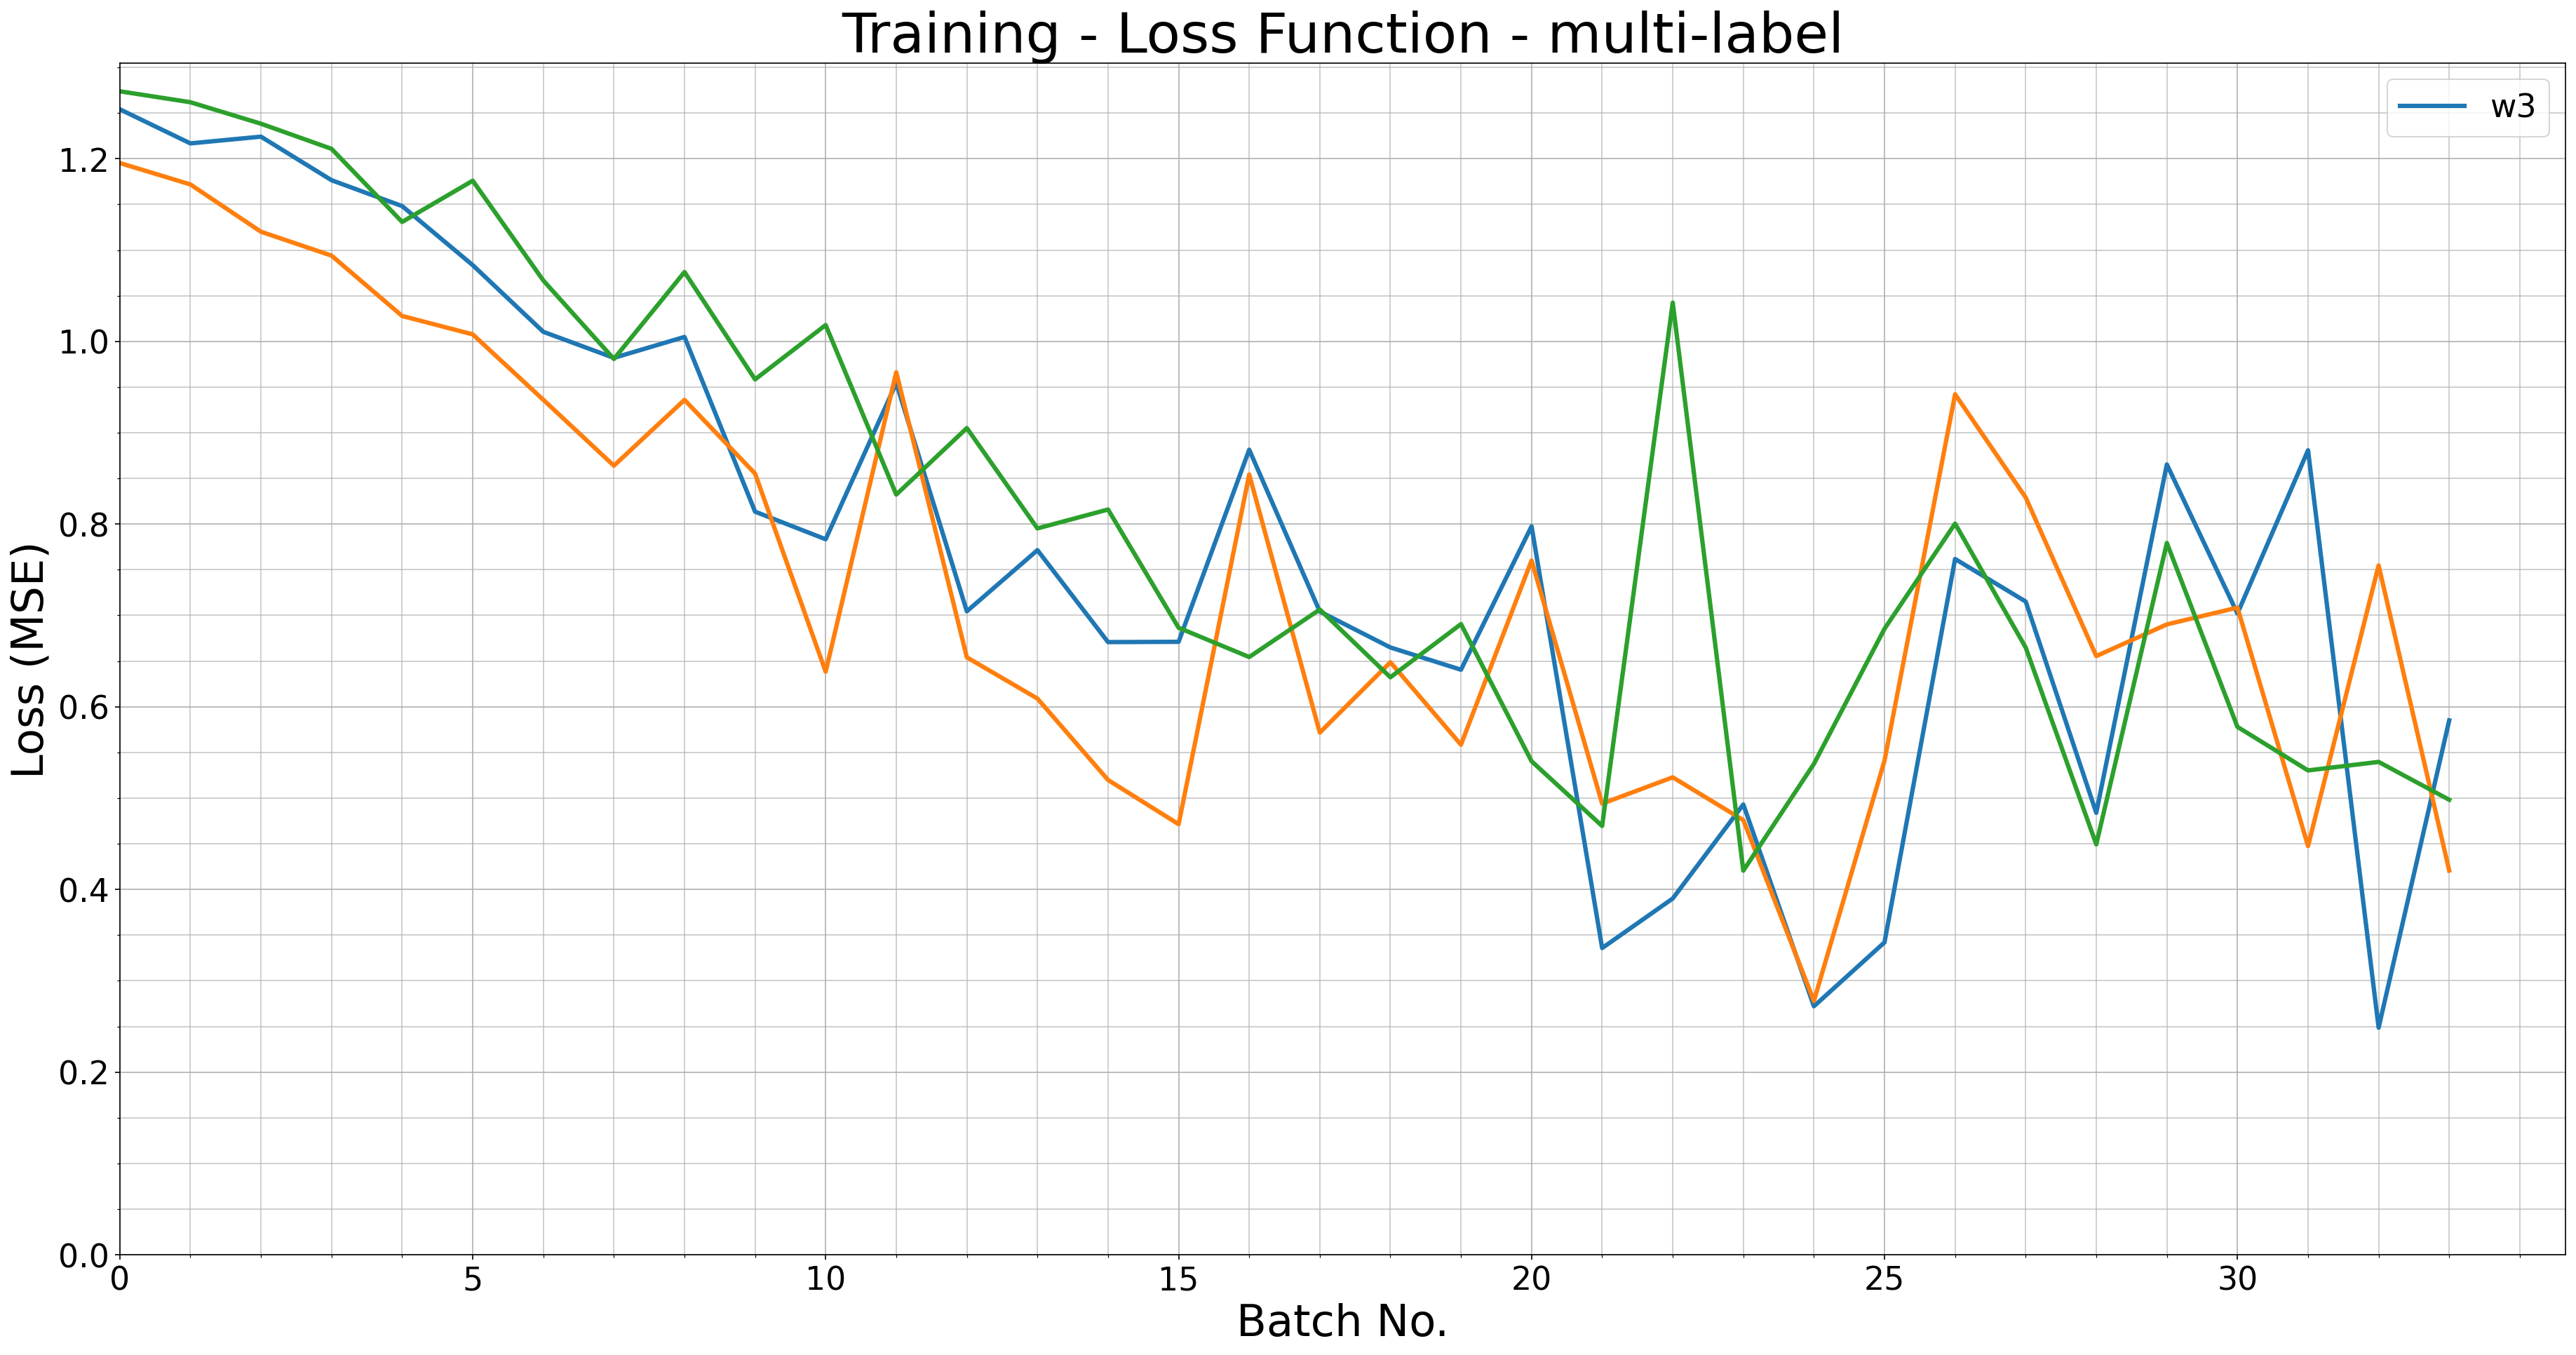


multi-label.png was Saved...


<Figure size 432x288 with 0 Axes>

In [14]:
api_server_instance.plot_loss(1)


The prediction phase contains 2 CSVs:
1) health_comb_predict: samples starting at 0
2) health_comb_predict: samples starting at 115

Please enter the name of the FULL LABELED PREDICTION DATA (including .csv): health_comb_prediction_test.csv
assuming 5 lables
Worker #0 report:
Overall informedness of prediction: 0.87
Worker #1 report:
Overall informedness of prediction: 0.786
Worker #2 report:
Overall informedness of prediction: 0.714


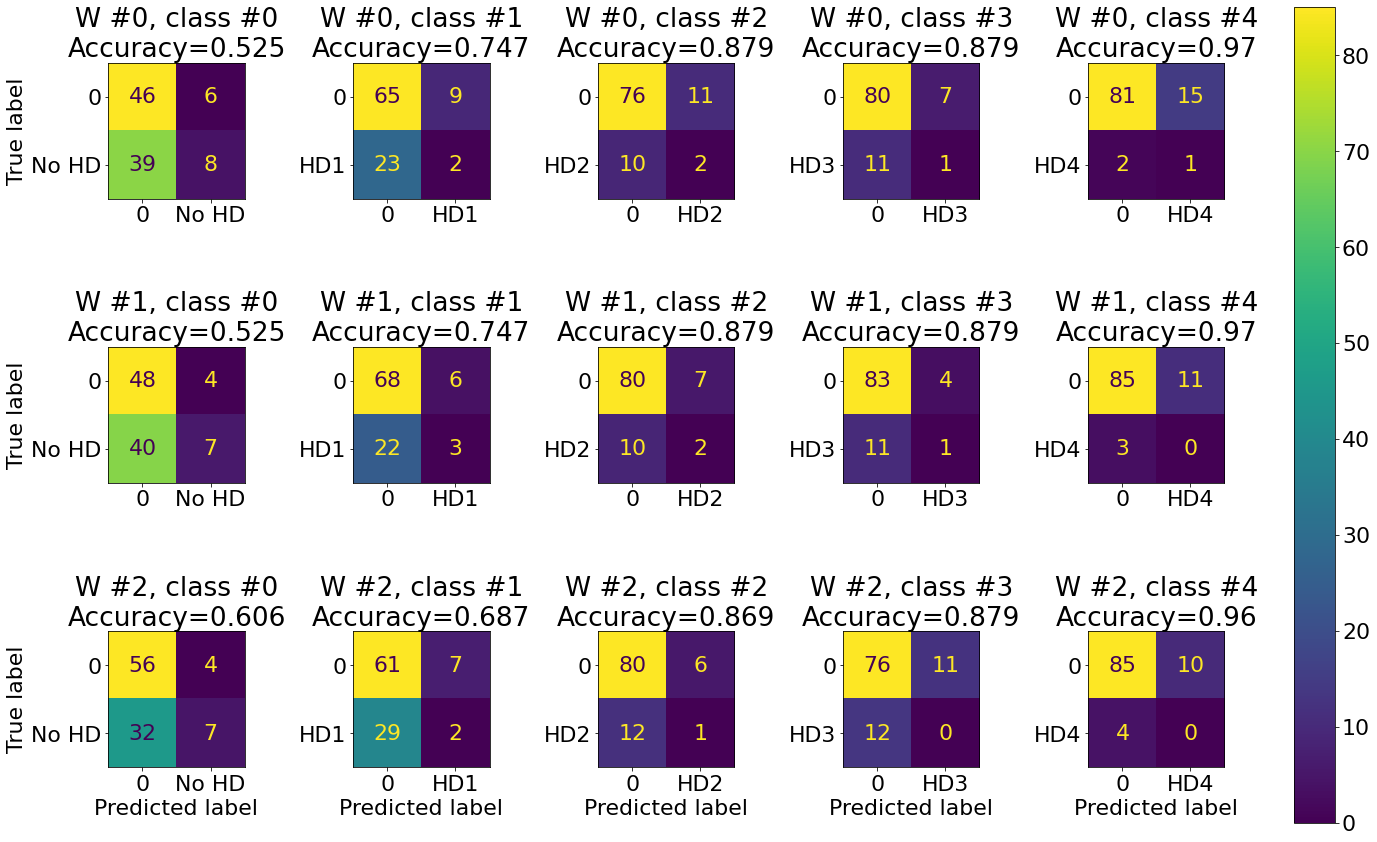


health_comb_predict.png Saved...


[[array([[46,  6],
         [39,  8]]),
  array([[65,  9],
         [23,  2]]),
  array([[76, 11],
         [10,  2]]),
  array([[80,  7],
         [11,  1]]),
  array([[81, 15],
         [ 2,  1]])],
 [array([[48,  4],
         [40,  7]]),
  array([[68,  6],
         [22,  3]]),
  array([[80,  7],
         [10,  2]]),
  array([[83,  4],
         [11,  1]]),
  array([[85, 11],
         [ 3,  0]])],
 [array([[56,  4],
         [32,  7]]),
  array([[61,  7],
         [29,  2]]),
  array([[80,  6],
         [12,  1]]),
  array([[76, 11],
         [12,  0]]),
  array([[85, 10],
         [ 4,  0]])]]

In [15]:
api_server_instance.accuracy_matrix(1)

In [16]:
#api_server_instance.contPhase("train")

In [17]:
#api_server_instance.contPhase("predict")